In [1]:
from shapey import Box
import numpy as np
import astropy.coordinates as astro_coord
from astropy.coordinates import SkyCoord, Distance
import seaborn as sns
import matplotlib as mpl
#sns.set_style("dark")
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
font = {#'family' : 'Helvetica',
        'size'   : 16}
from shapey import Box
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.io import ascii
import pandas as pd
from scipy import stats
%matplotlib inline

In [2]:
path_plot = '/users/caganze/research/stellarstreams/figures/palomar5/'
path_data = '/users/caganze/research/stellarstreams/data/palomar5/'

In [3]:
#functions
def roman_fov(center, xextent, yextent):
    b=Box()
    x_min, x_max =center[0]- xextent/2, center[0]+ xextent/2
    y_min, y_max =center[-1]- yextent/2, center[-1]+ yextent/2
    v1= (x_min, y_min)
    v2=(x_min, y_max)
    v4= (x_max, y_min)
    v3=(x_max,y_max)
    

    b.vertices=[v1, v2, v3, v4, v1]
    #b._data=[ra,## dec]
    return b

#length and ith of the stream 
#procedure 
def compute_width(m, vc, Rgc):
    return Rgc*((m*G/(vc**2*Rgc))**(1/3))

def compute_physical_length(Rgc, m, vc, t):
    return  ((m*vc/Rgc)**(1/3))*t

In [4]:
andr_distance= 770*u.kpc
andr_vc= 250*u.km/u.s
milky_vc= 217*u.km/u.s

In [5]:
scaled_fov= 0.52*u.degree*(13.67*u.kpc/u.degree)
scaled_arcmin= (10*u.arcmin.to(u.degree)*u.degree)*(13.67*u.kpc/u.degree)

In [6]:
final_stream=SkyCoord(np.load(path_data+'/pal5_streamer_evolved.npy', allow_pickle=True).flatten())

In [7]:
bckgd1000s=ascii.read(path_data+'/WFIfilters_extendedIsochrones_allbandsRAdec_27.15_M31_50_60kpc.txt').to_pandas()

In [8]:
bckgd1hr=ascii.read(path_data+'/WFIfilters_extendedIsochrones_allbandsRAdec_28.54_M31_50_60kpc.txt').to_pandas()

In [9]:
len(bckgd1hr), len(bckgd1000s)

(329000, 94083)

In [10]:
#metallicity cuts
bckgd1000s=bckgd1000s[bckgd1000s.FeH_phot<-1]
bckgd1hr=bckgd1hr[bckgd1hr.FeH_phot<-1]

In [11]:
len(bckgd1hr), len(bckgd1000s)

(111944, 34695)

In [12]:
d_M31 = 770*u.kpc
kpc_conversion = np.pi * d_M31 / 180.

In [13]:
NSAMPLES={'1000sec': 260 , '1hour':1300}

In [14]:
box_centers=[(7.5, 5.0), (5., 0.), (10.0, 10.), (5, -5)]

In [15]:
plt.style.use('dark_background')

In [16]:
#scale on the scale of andromeda 
bxs=[]
for cen in box_centers:
    bx=roman_fov(np.flip(cen), scaled_fov.value, scaled_fov.value)
    bx.color='none'
    bx.edgecolor='y'
    bx.alpha=1.
    bxs.append(bx)

In [17]:
#choice
choices= np.random.choice(np.arange(len(final_stream.x.value)), int(NSAMPLES['1hour']))
choices2= np.random.choice(np.arange(len(final_stream.x.value)), int(NSAMPLES['1000sec']))

In [18]:
len(final_stream.x[choices]), len(final_stream.x[choices2])

(1300, 260)

In [19]:
bx=bxs[0]
gap_center=box_centers[0]

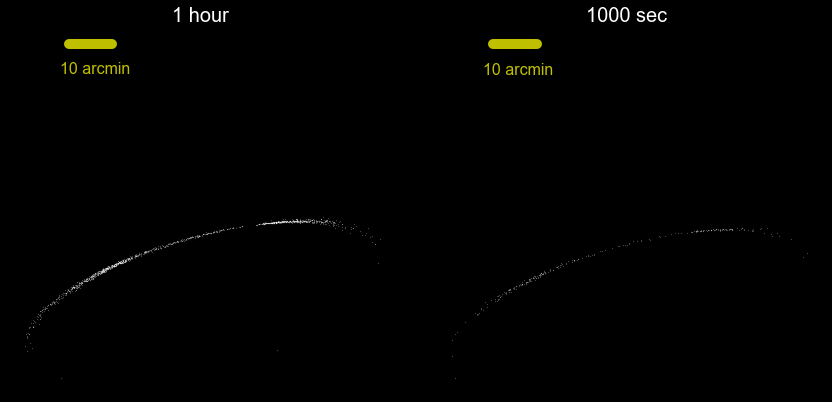

In [20]:
fig, ax=plt.subplots(figsize=(12, 6), ncols=2)

ax[0].scatter( final_stream.y[choices], final_stream.x[choices],  s=0.01, alpha=1, c='#FFFFFF')
ax[1].scatter(final_stream.y[choices2], final_stream.x[choices2], s=0.01, alpha=1, c='#FFFFFF')

shift0=np.nanmedian(kpc_conversion*bckgd1hr.RA.values)-gap_center[0]*u.kpc
shift1=np.nanmedian(kpc_conversion*bckgd1hr.dec.values)-gap_center[1]*u.kpc
#ax[0].scatter(kpc_conversion*bckgd1hr.dec.values-shift1, \
#              kpc_conversion*bckgd1hr.RA.values-shift0, s=0.01, c='#FFFFFF', alpha=1)

shift0_1000sec=np.nanmedian(kpc_conversion*bckgd1000s.RA.values)-gap_center[0]*u.kpc
shift1_1000sec=np.nanmedian(kpc_conversion*bckgd1000s.dec.values)-gap_center[1]*u.kpc
#ax[-1].scatter(kpc_conversion*bckgd1000s.dec.values-shift1_1000sec, \
#               kpc_conversion*bckgd1000s.RA.values-shift0_1000sec,s=0.01, c='#FFFFFF', alpha=1)

#for b in bxs:
#bx.plot(ax=ax[0])
#bx.plot(ax=ax[-1])
for a in ax:
   
    a.plot((3.8-10, 6.15-10),  (20, 20), lw=10, c='y', linestyle='-')
    a.text(3.8-10.5, 20-2, r'10 arcmin', fontsize=16, c='y')
#    a.set_xlabel('x (kpc)', fontsize=18)
#    a.set_ylabel('y (kpc)', fontsize=18)
#    a.minorticks_on()
ax[0].set_title('1 hour ', fontsize=20)
ax[-1].set_title('1000 sec ', fontsize=20)
plt.tight_layout()
ax[0].axis('off')
ax[-1].axis('off')
plt.savefig(path_plot+'pal5_in_andromeda_nobckdg.jpeg')

In [21]:
selected_1hr=bx.select(np.array([final_stream.y[choices], final_stream.x[choices]]))
selected_bck_1hr=bx.select(np.array([kpc_conversion*bckgd1hr.dec.values-shift1, \
                           kpc_conversion*bckgd1hr.RA.values-shift0]))

selected_1000s=bx.select(np.array([final_stream.y[choices2], final_stream.x[choices2]]))
selected_bck_1000s=bx.select(np.array([kpc_conversion*bckgd1000s.dec.values-shift1_1000sec, \
                              kpc_conversion*bckgd1000s.RA.values-shift0_1000sec]))

In [22]:
#save these data as an image
img_1hr={'stream':selected_1hr, 'bckgd': selected_bck_1hr}
img_1000s={'stream': selected_1000s,
         'bckgd':  selected_bck_1000s}

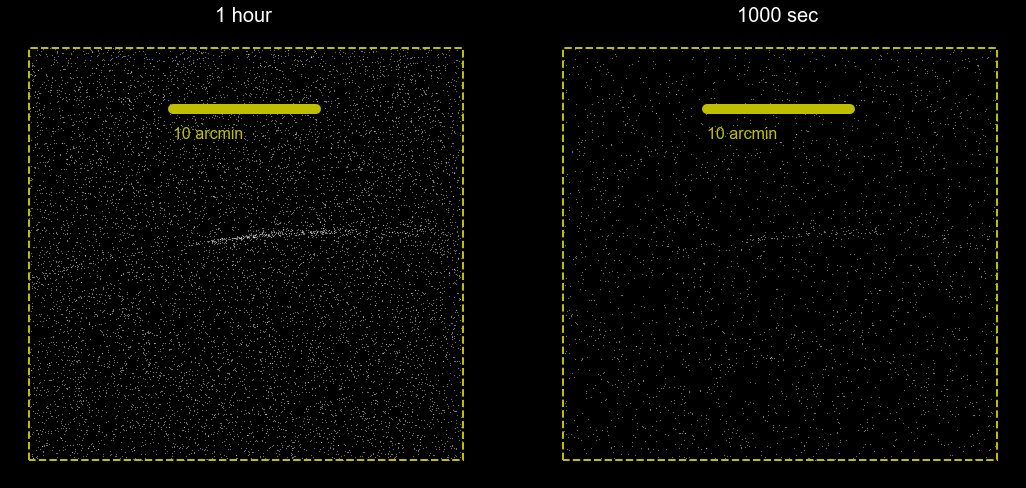

In [23]:
fig, ax=plt.subplots(figsize=(10*1.5, 5*1.5), ncols=2)
ax[0].scatter(selected_bck_1hr[0], selected_bck_1hr[1], s=0.03, c='#FFFFFF')
ax[0].scatter(selected_1hr[0], selected_1hr[1], s=0.03,c='#FFFFFF')

ax[1].scatter(selected_bck_1000s[0], selected_bck_1000s[1], s=0.03,c='#FFFFFF')
ax[1].scatter(selected_1000s[0], selected_1000s[1], s=0.03, c='#FFFFFF')

bx.plot(ax=ax[0])
bx.plot(ax=ax[-1])

for a in ax:
    a.plot((3.8, 6.15),  (10, 10), lw=10, c='y', linestyle='-')
    a.text(3.8, 10-0.5, r'10 arcmin', fontsize=16, c='y')
    a.set_xlabel('x (kpc)', fontsize=18)
    a.set_ylabel('y (kpc)', fontsize=18)


ax[0].set_title('1 hour ', fontsize=20)
ax[-1].set_title('1000 sec ', fontsize=20)
plt.tight_layout()
ax[0].axis('off')
ax[-1].axis('off')
plt.savefig(path_plot+'metal_poor_pal5_in_andromeda_roman.jpeg')

In [24]:
import glob
filenames=glob.glob(path_plot+'*pal5_in_andromeda_roman.jpeg')

In [25]:
filenames

['/users/caganze/research/stellarstreams/figures/palomar5/metal_poor_pal5_in_andromeda_roman.jpeg']

In [26]:
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(path_plot+'/romanExposure.gif', images)

In [27]:
#save these data 
images={'1hr':img_1hr, '1000s': img_1000s}
np.save(path_data+'/mock_images_bckg_metalpoor.npy', images )